#Sales Spike Business Case Overview

In [22]:
# membaca library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# membaca dataset dari file csv
df_transaction = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_transaction.csv')
df_product = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/tbl_product.csv')

In [31]:
# menggabungkan dua dataset
df_merged = pd.merge(df_transaction, df_product, on='product_id', how='left')

In [32]:
# mengurutkan dataset yang baru sesuai ketentuan
df_merged = df_merged[['trx_id', 'trx_date', 'product_id', 'product_name', 'product_category', 'product_cost', 'product_price', 'units']]

In [33]:
# menampilkan dataset 5 data teratas
print(df_merged.head())

       trx_id  trx_date    product_id        product_name product_category  \
0  DQTrx00002   1012024  DQProduk-001   Buku Agenda DQLab      Merchandise   
1  DQTrx00014   1012024  DQProduk-009  Pulpen Metal DQLab       Alat Tulis   
2  DQTrx00034   1012024  DQProduk-001   Buku Agenda DQLab      Merchandise   
3  DQTrx00039   1012024  DQProduk-009  Pulpen Metal DQLab       Alat Tulis   
4  DQTrx00047   1012024  DQProduk-001   Buku Agenda DQLab      Merchandise   

   product_cost  product_price  units  
0        149850         239850    1.0  
1        149850         164850    1.0  
2        149850         239850    1.0  
3        149850         164850    1.0  
4        149850         239850    3.0  


In [34]:
# menampilkan dataset 5 data terbawah
print(df_merged.tail())

             trx_id  trx_date    product_id        product_name  \
170044  DQTrx829253  30092025  DQProduk-019  Kertas Warna DQLab   
170045  DQTrx829255  30092025  DQProduk-003  Sticky Notes DQLab   
170046  DQTrx829256  30092025  DQProduk-019  Kertas Warna DQLab   
170047  DQTrx829258  30092025  DQProduk-019  Kertas Warna DQLab   
170048  DQTrx829260  30092025  DQProduk-019  Kertas Warna DQLab   

       product_category  product_cost  product_price  units  
170044   Kertas & Cetak        209850         239850    1.0  
170045       Alat Tulis         29850          59850    3.0  
170046   Kertas & Cetak        209850         239850    1.0  
170047   Kertas & Cetak        209850         239850    1.0  
170048   Kertas & Cetak        209850         239850    1.0  


In [35]:
# Melihat jumlah baris dan kolom
print(df_merged.shape)

(170049, 8)


In [36]:
# Malihat Informasi tentang data
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170049 entries, 0 to 170048
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trx_id            170049 non-null  object 
 1   trx_date          170049 non-null  int64  
 2   product_id        170049 non-null  object 
 3   product_name      170049 non-null  object 
 4   product_category  170049 non-null  object 
 5   product_cost      170049 non-null  int64  
 6   product_price     170049 non-null  int64  
 7   units             170045 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 10.4+ MB
None


## Membersihkan Data

In [37]:
#merubah format trx_date menjadi tanggal
df_merged['trx_date'] = pd.to_datetime(df_merged['trx_date'].astype(str), format = '%d%m%Y', errors = 'coerce')

#merubah format units menjadi integer
df_merged['units'] = df_merged["units"].fillna(0).astype(int)

#menghapus nilai yang kosong
df_merged = df_merged.dropna()

#menghapus duplikasi
df_merged = df_merged.drop_duplicates()

#menampilkan dataset
print(df_merged.head())

       trx_id   trx_date    product_id        product_name product_category  \
0  DQTrx00002 2024-01-10  DQProduk-001   Buku Agenda DQLab      Merchandise   
1  DQTrx00014 2024-01-10  DQProduk-009  Pulpen Metal DQLab       Alat Tulis   
2  DQTrx00034 2024-01-10  DQProduk-001   Buku Agenda DQLab      Merchandise   
3  DQTrx00039 2024-01-10  DQProduk-009  Pulpen Metal DQLab       Alat Tulis   
4  DQTrx00047 2024-01-10  DQProduk-001   Buku Agenda DQLab      Merchandise   

   product_cost  product_price  units  
0        149850         239850      1  
1        149850         164850      1  
2        149850         239850      1  
3        149850         164850      1  
4        149850         239850      3  


## Identifikasi Spike dan Rekomendasi
## Feature Engineering

In [38]:
#membuat kolom periode (bulan)
df_merged['trx_month'] = df_merged['trx_date'].dt.to_period('M').dt.to_timestamp()

#membuat agregasi penjualan per produk per bulan
df_sales_summary = df_merged.groupby(['trx_month', 'product_id', 'product_name'])['units'].sum().reset_index()

#Hitung total units per produk (keseluruhan bulan)
top_products = df_sales_summary.groupby('product_name')['units'].sum().nlargest(5).index

#Filter df_sales_summary hanya untuk 10 produk terlaris
df_top_sales = df_sales_summary[df_sales_summary['product_name'].isin(top_products)].copy()

#menampilkan dataset
print(df_top_sales.head())


   trx_month    product_id        product_name  units
0 2024-01-01  DQProduk-001   Buku Agenda DQLab   3709
1 2024-01-01  DQProduk-003  Sticky Notes DQLab   1243
2 2024-01-01  DQProduk-009  Pulpen Metal DQLab   2882
3 2024-01-01  DQProduk-019  Kertas Warna DQLab     17
4 2024-02-01  DQProduk-001   Buku Agenda DQLab   3227


## Identifikasi Spike

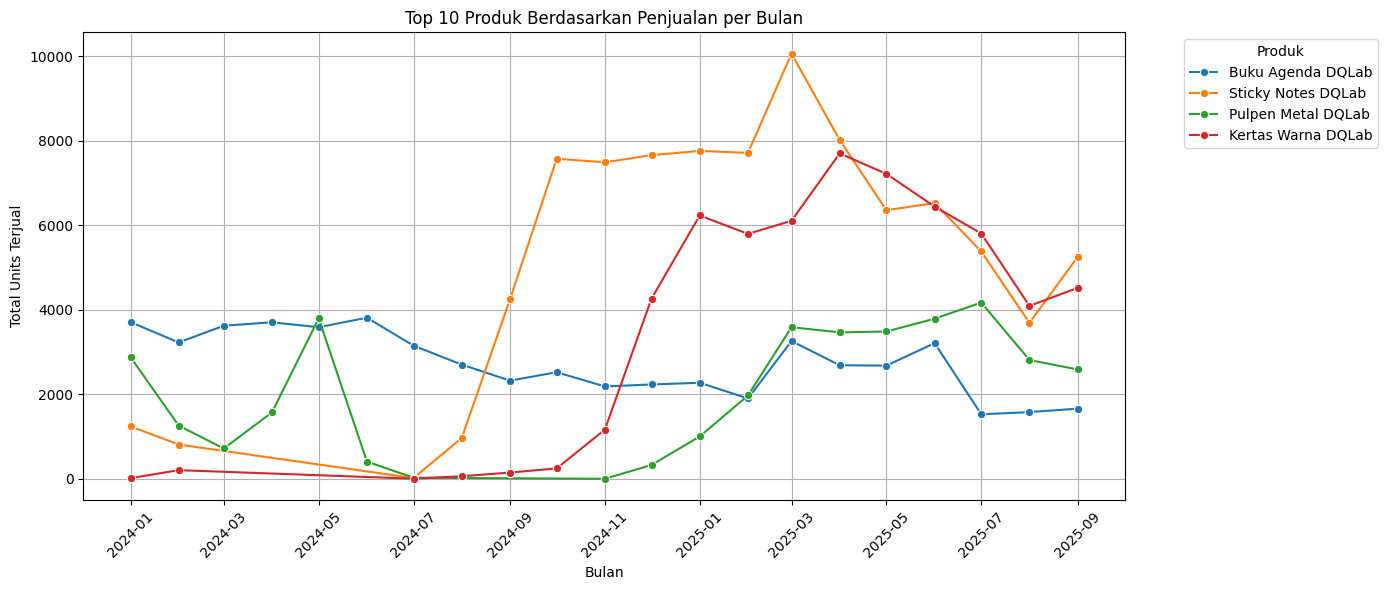

In [39]:
#Visualisasikan Data
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_top_sales, x = 'trx_month', y = 'units', hue = 'product_name', marker = 'o')
plt.title('Top 10 Produk Berdasarkan Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Units Terjual')
plt.xticks(rotation = 45)
plt.legend(title = 'Produk', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

**Analisis Lonjakan Penjualan Produk DoLab**

Grafik penjualan bulanan menunjukkan dinamika performa empat produk utama DoLab sepanjang periode Oktober 2014 hingga September 2015. Produk Buku Agenda DoLab secara konsisten mendominasi penjualan, dengan beberapa lonjakan signifikan yang mengindikasikan momen puncak permintaan—kemungkinan dipicu oleh musim akademik, promosi, atau pengadaan kantor.

Produk Sticky Notes DoLab dan Pulpen Metal DoLab menunjukkan pola penjualan yang fluktuatif, dengan lonjakan pada bulan-bulan tertentu seperti awal dan pertengahan tahun. Ini membuka peluang untuk strategi pemasaran berbasis musim atau event. Sementara itu, Kertas Wilma DoLab tampil sebagai produk dengan penjualan yang relatif stabil, cocok untuk kebutuhan rutin.

Secara keseluruhan, tren penjualan ini memberikan wawasan penting bagi pengambilan keputusan bisnis, seperti penjadwalan promosi, pengelolaan stok, dan segmentasi pasar. Dengan memahami pola lonjakan dan stabilitas penjualan, perusahaan dapat mengoptimalkan strategi distribusi dan meningkatkan efisiensi operasional.